In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter
import re
from pattern.en import sentiment
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stopwords=set(stopwords.words('english'))

In [2]:
#Carga de datos
df = pd.read_csv("GrammarandProductReviews.csv")
train_set = df['reviews.text']
reviews = df['reviews.text']

# Limpieza de datos

In [3]:
#Se pasa todo a minusculas
reviews = reviews.apply(lambda x: x.lower() if type(x) == str else x)
#Se eliminan caracteres especiales
reviews = reviews.apply(lambda x: re.sub('[^a-zA-Z0-9 ]+','', x) if type(x) == str else x)
#Se eliminan URL
reviews = reviews.apply(lambda x: re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',x) if type(x) == str else x)

# Exploracion

In [4]:
#Se realiza un conteo de la cantidad de palabras
frec = Counter()
for i in reviews:
    frec.update(w for w in str(i).split())
frec

Counter({'i': 108934,
         'love': 16899,
         'this': 67149,
         'album': 215,
         'its': 9366,
         'very': 11924,
         'good': 12201,
         'more': 6448,
         'to': 61987,
         'the': 116964,
         'hip': 7,
         'hop': 4,
         'side': 438,
         'than': 4375,
         'her': 1173,
         'current': 111,
         'pop': 321,
         'sound': 776,
         'so': 16061,
         'hype': 59,
         'listen': 129,
         'everyday': 769,
         'at': 7825,
         'gym': 85,
         'give': 1279,
         'it': 68360,
         '5star': 11,
         'rating': 122,
         'all': 11924,
         'way': 3172,
         'metaphors': 1,
         'are': 13209,
         'just': 8423,
         'crazy': 234,
         'flavor': 367,
         'review': 18907,
         'was': 40648,
         'collected': 17726,
         'as': 32830,
         'part': 18666,
         'of': 52300,
         'a': 77978,
         'promotion': 17734,
         '

In [5]:
#Se eliminan las stopwords
for i in stopwords:
    del frec[i]
frec

Counter({'love': 16899,
         'album': 215,
         'good': 12201,
         'hip': 7,
         'hop': 4,
         'side': 438,
         'current': 111,
         'pop': 321,
         'sound': 776,
         'hype': 59,
         'listen': 129,
         'everyday': 769,
         'gym': 85,
         'give': 1279,
         '5star': 11,
         'rating': 122,
         'way': 3172,
         'metaphors': 1,
         'crazy': 234,
         'flavor': 367,
         'review': 18907,
         'collected': 17726,
         'part': 18666,
         'promotion': 17734,
         'read': 384,
         'reviews': 611,
         'looking': 2142,
         'buying': 1166,
         'one': 10169,
         'couples': 10,
         'lubricants': 1,
         'ultimately': 24,
         'disappointed': 1202,
         'didnt': 2934,
         'even': 4311,
         'live': 785,
         'starters': 11,
         'neither': 53,
         'boyfriend': 76,
         'could': 2477,
         'notice': 741,
         'sort': 

In [6]:
#Se presentan las 5 palabras mas comunes
frec.most_common(5)

[('great', 20946),
 ('product', 20267),
 ('movie', 19734),
 ('review', 18907),
 ('part', 18666)]

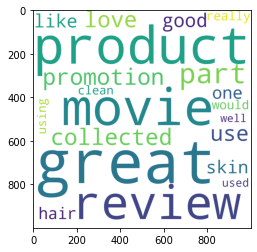

In [7]:
#Se crea la nube de palabras
nube = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(frec)
plt.imshow(nube)

In [8]:
#Se verifica el sentiminiento de las palabras individuales
PalabrasUnicas=[]
for key in frec:
    PalabrasUnicas.append(key)

In [9]:
#Se verifica el sentimineto de las palabras
Buena=0
Neutra=0
Mala=0
for i in range(len(PalabrasUnicas)):
    temporal=sentiment(PalabrasUnicas[i])
    if temporal[0] > 0:
        Buena+=1
    elif temporal[0]==0:
        Neutra+=1
    elif temporal[0] < 0:
        Mala+=1
print("Palabras Buenas: "+str(Buena))
print("Palabras Neutras: "+str(Neutra))
print("Palabras Malas: "+str(Mala))

Palabras Buenas: 597
Palabras Neutras: 34420
Palabras Malas: 535
